# Clusterin jerarquico y dendogramas
 * X dataset ( array de n x m) puntos a clusterizar
 * n numero de datos
 * numero de rangos
 * Z array de enlace de cluster con la informacion de las uniones
 * k numero de cluster

In [28]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

(150, 2)


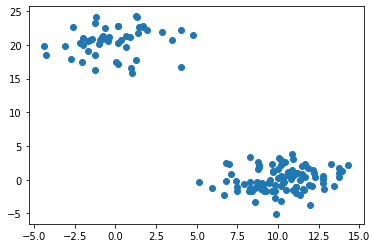

In [29]:
np.random.seed(4771)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size =[100])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size =[50])
X = np.concatenate((a,b))
print (X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [30]:
Z = linkage(X,"ward")

In [31]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [32]:
c, coph_dist= cophenet(Z, pdist(X))
c

0.9805950232081639

In [33]:
Z[0]

array([1.14000000e+02, 1.41000000e+02, 2.22006344e-02, 2.00000000e+00])

In [34]:
Z[1]

array([2.80000000e+01, 7.10000000e+01, 3.27852211e-02, 2.00000000e+00])

In [35]:
Z[:20]

array([[1.14000000e+02, 1.41000000e+02, 2.22006344e-02, 2.00000000e+00],
       [2.80000000e+01, 7.10000000e+01, 3.27852211e-02, 2.00000000e+00],
       [1.10000000e+01, 4.60000000e+01, 4.18817955e-02, 2.00000000e+00],
       [5.70000000e+01, 1.52000000e+02, 8.32762312e-02, 3.00000000e+00],
       [1.26000000e+02, 1.38000000e+02, 1.00764553e-01, 2.00000000e+00],
       [1.32000000e+02, 1.37000000e+02, 1.10999884e-01, 2.00000000e+00],
       [4.80000000e+01, 8.40000000e+01, 1.15804341e-01, 2.00000000e+00],
       [2.10000000e+01, 9.60000000e+01, 1.23457782e-01, 2.00000000e+00],
       [4.40000000e+01, 6.80000000e+01, 1.32536249e-01, 2.00000000e+00],
       [6.20000000e+01, 7.40000000e+01, 1.33646529e-01, 2.00000000e+00],
       [5.00000000e+00, 7.60000000e+01, 1.37508735e-01, 2.00000000e+00],
       [1.00000000e+01, 3.30000000e+01, 1.57085690e-01, 2.00000000e+00],
       [2.90000000e+01, 9.90000000e+01, 1.58293333e-01, 2.00000000e+00],
       [1.05000000e+02, 1.25000000e+02, 1.61009904e

In [36]:
Z[95-len(X)]

array([64.        , 72.        ,  1.21743554,  2.        ])

In [37]:
X[[64,8,72]]

array([[ 5.91029744, -1.23587297],
       [12.79288036,  0.54061761],
       [ 5.11615513, -0.31311228]])

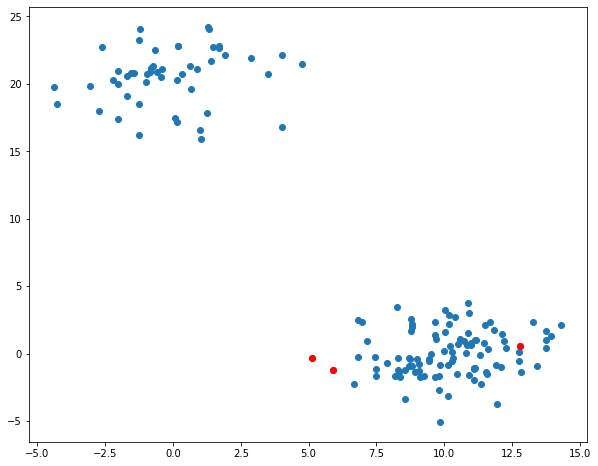

In [38]:
idx =[64,8,72]
plt.figure(figsize=(10,8))
plt.scatter (X[:,0], X[:,1])
plt.scatter(X[idx,0],X[idx,1], c='r')
plt.show()

# Representacion grafica de un dendograma

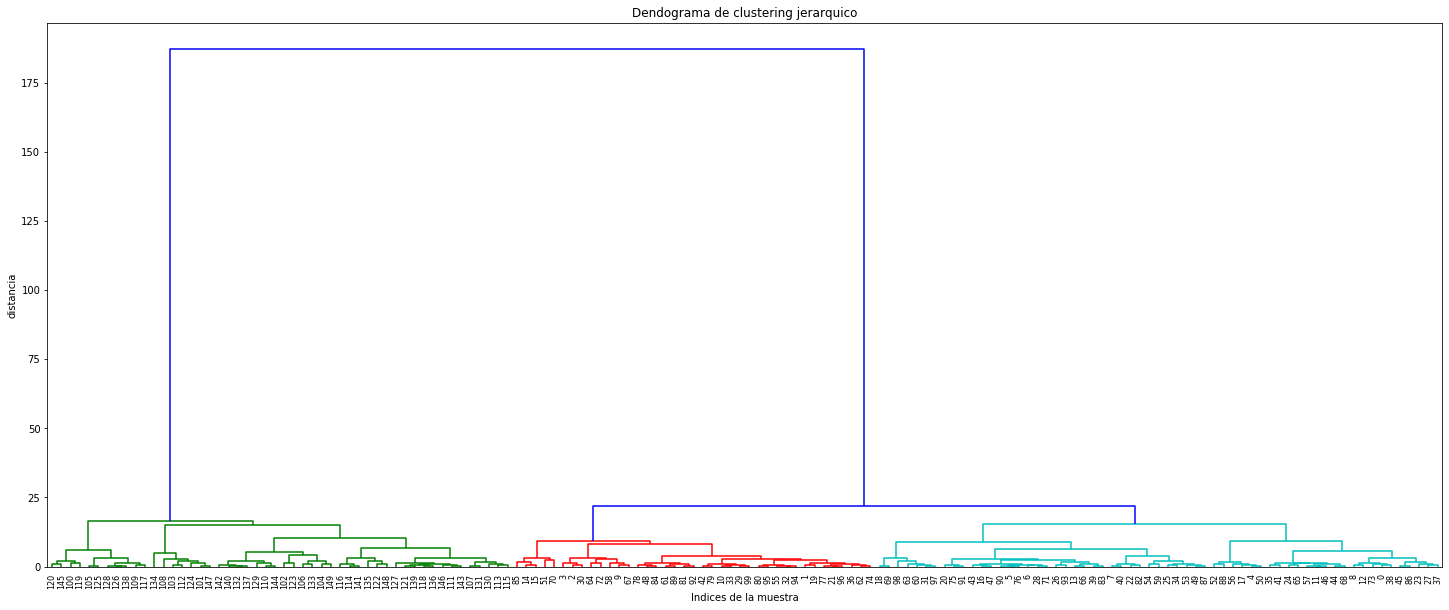

In [39]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico")
plt.xlabel("Indices de la muestra")
plt.ylabel("distancia")
dendrogram(Z,leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.1*180)
plt.show()

In [40]:
Z[-4:,]

array([[290.        , 292.        ,  15.32085461,  61.        ],
       [286.        , 294.        ,  16.57779777,  50.        ],
       [291.        , 295.        ,  21.75681937, 100.        ],
       [296.        , 297.        , 187.29817801, 150.        ]])

# # Truncar el dendrograma

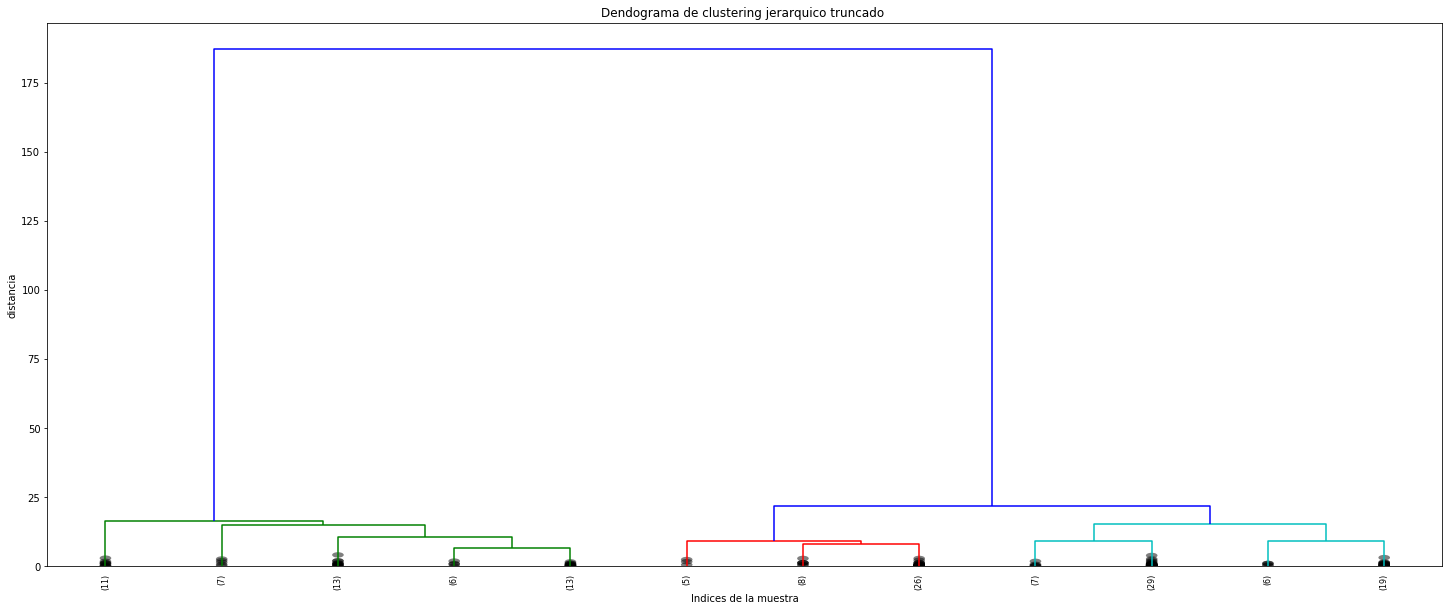

In [41]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico truncado ")
plt.xlabel("Indices de la muestra")
plt.ylabel("distancia")
dendrogram(Z,leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.1*180,
           truncate_mode="lastp", p=12,show_leaf_counts=True, show_contracted=True)
plt.show()

# Dendrograma tuneado 

In [42]:
def dendrogram_tune(*args,**kwargs):
    max_d=kwargs.pop("max_d", None)
    if max_d and "color_thereshold" not in kwargs:
        kwargs["color_thereshold"]=max_d
    annotate_above =kwargs.pop('annotate_above', 0 )
    ddata= dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerarquico con dendrograma truncado")
        plt.xlabel("Indice del dataset (o tamaño del clster)")
        plt.ylabel("distancia")
        for i ,d,c in zip(ddata['icoord'],ddata['dcoord'], ddata['color_list']):
            x= 0.5 *sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y,(x,y),xytext=(0,-5),
                            textcoords="offset points", va= "top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c="k")
    return ddata

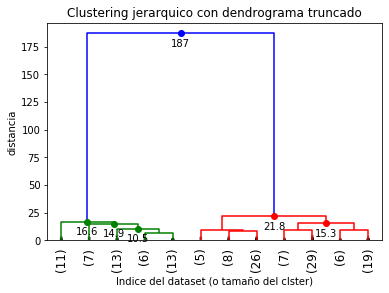

In [43]:
dendrogram_tune(Z,truncate_mode ='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted= True,
                annotate_above=10)
plt.show()

# Corte automatico del dedrograman

In [44]:
from scipy.cluster.hierarchy import inconsistent

In [45]:
depth = 3 
incons = inconsistent (Z,depth)
incons[-10:]

array([[ 3.40031118,  2.27763151,  7.        ,  2.06560364],
       [ 3.90361792,  2.98605749,  7.        ,  1.72530143],
       [ 4.5033253 ,  2.89984212,  7.        ,  1.58753801],
       [ 3.34478572,  3.03788153,  7.        ,  1.91442035],
       [ 4.96721451,  2.90864259,  7.        ,  1.89902704],
       [ 7.47455649,  4.46535916,  6.        ,  1.65870186],
       [ 7.2219165 ,  4.51694134,  7.        ,  1.79301379],
       [ 8.20644671,  5.84241531,  7.        ,  1.43285792],
       [10.78427566,  6.01988723,  7.        ,  1.82271582],
       [38.69140559, 65.73116841,  7.        ,  2.26082658]])

# Método del codo

[187.29817801  21.75681937  16.57779777  15.32085461  14.88125605
  10.49080543   9.16056794   9.1069349    9.05546718   8.10499512]


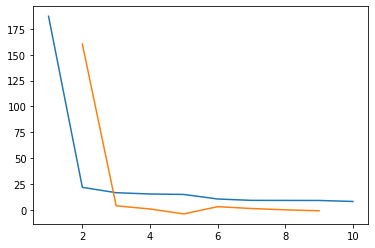

2


In [49]:
last=Z[-10:,2]
last_rev = last[::-1]
print (last_rev)
idx =np.arange(1,len(last)+1)
plt.plot(idx,last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k= acc_rev.argmax() + 2
print (k)

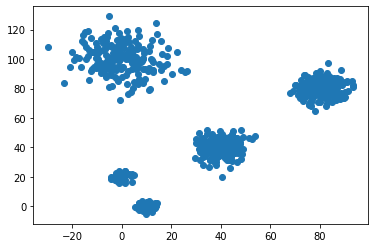

In [51]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [52]:
Z2=linkage(X2,"ward")

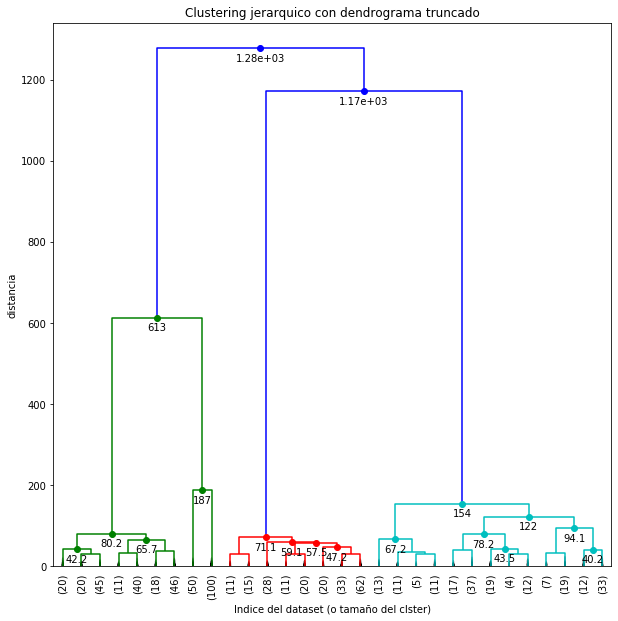

In [58]:
plt.figure(figsize =(10,10))
dendrogram_tune(
    Z2,
    truncate_mode ="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size = 10.,
    show_contracted = True,
    annotate_above= 40

)
plt.show()

[1276.76271558 1171.59049171  612.62853511  187.29817801  153.75569547
  122.33118651   94.14120456   80.20022814   78.19578304   71.06699103]


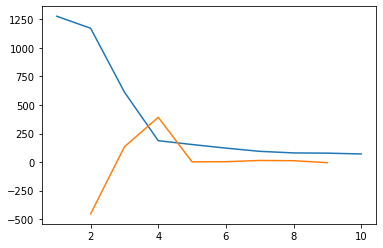

4


In [60]:
last=Z2[-10:,2]
last_rev = last[::-1]
print (last_rev)
idx =np.arange(1,len(last)+1)
plt.plot(idx,last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k= acc_rev.argmax() + 2
print (k)

In [61]:
print (inconsistent(Z2, 5)[-10:])

[[ 16.91597523  19.20905345  29.           2.81903613]
 [ 14.05849738  16.25315026  30.           3.94614488]
 [ 18.51952031  17.84814573  30.           3.45586084]
 [ 15.85527543  18.91949757  26.           4.13784398]
 [ 26.69154426  27.20550328  30.           3.51545205]
 [ 34.02713736  35.94383941  30.           3.33098968]
 [ 12.23466974  33.47901756  30.           5.22905154]
 [ 44.03598613 111.10374306  31.           5.11767231]
 [ 75.56910549 206.54003377  31.           5.30658084]
 [144.52272183 308.58360517  31.           3.66915149]]


In [66]:
from scipy.cluster.hierarchy import fcluster

In [68]:
max_d=20
clusters =fcluster(Z, max_d, criterion ="distance")
clusters

array([3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [69]:
k = 3
clusters = fcluster (Z,k,criterion ="maxclust")
clusters

array([3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [70]:
fcluster (Z,8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

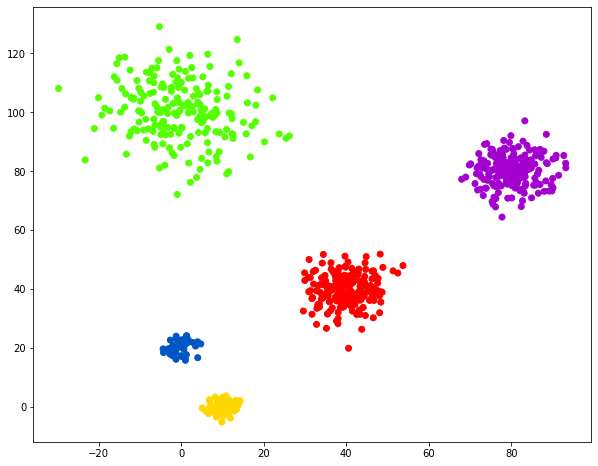

In [74]:
max_d=170
clusters =fcluster(Z2, max_d, criterion ="distance")
clusters

plt.figure(figsize=( 10,8))
plt.scatter(X2[:,0], X2[:,1], c =clusters, cmap="prism")
plt.show()